In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('AMZN.csv',
                  header=0,
                  usecols=['Date', 'Close'],
                  parse_dates=True,
                  index_col='Date')

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4529 entries, 2000-11-21 to 2018-11-21
Data columns (total 1 columns):
Close    4529 non-null float64
dtypes: float64(1)
memory usage: 70.8 KB
None


In [5]:
print(data.head())

              Close
Date               
2000-11-21  24.2500
2000-11-22  25.1875
2000-11-24  28.9375
2000-11-27  28.0000
2000-11-28  25.0312


In [6]:
print(data.describe())

             Close
count  4529.000000
mean    290.353723
std     407.211585
min       5.970000
25%      39.849998
50%     117.889999
75%     327.440002
max    2039.510010


In [7]:
import matplotlib.pyplot as plt


/Users/owl/anaconda3/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


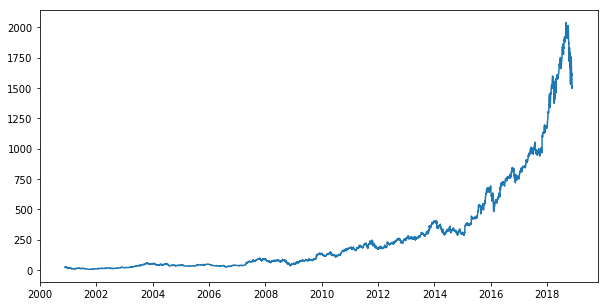

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(data)
plt.show()

In [9]:
dataPCh = data.pct_change()

In [10]:
import numpy as np

In [11]:
log_returns = np.log(1 + dataPCh)

In [12]:
print(log_returns.tail(10))

               Close
Date                
2018-11-08 -0.000330
2018-11-09 -0.024504
2018-11-12 -0.045140
2018-11-13 -0.003476
2018-11-14 -0.019913
2018-11-15  0.012696
2018-11-16 -0.016204
2018-11-19 -0.052251
2018-11-20 -0.011191
2018-11-21  0.014123


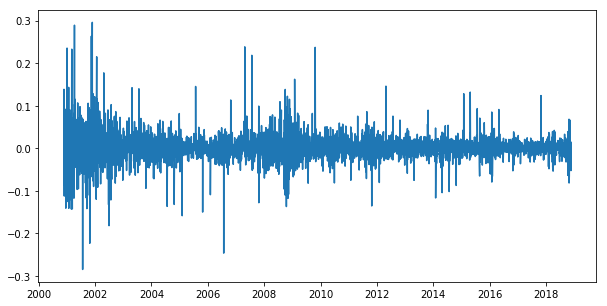

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(log_returns)
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaled_data = scaler.fit_transform(data)

In [18]:
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length

In [19]:
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

In [20]:
print(len(train_data), len(test_data))

3170 1359


In [21]:
def dataset_creation(dataset, timestep=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - timestep - 1):
        a = dataset[i:(i + timestep), 0]
        data_x.append(a)
        data_y.append(dataset[i + timestep, 0])
    return np.array(data_x), np.array(data_y)

In [22]:
time_step = 1
train_x, train_y = dataset_creation(train_data, time_step)
test_x, test_y = dataset_creation(test_data, time_step)

In [23]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [24]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

Using TensorFlow backend.


In [25]:
model = Sequential()

In [26]:
model.add(LSTM(256, input_shape=(1, time_step)))

Instructions for updating:
Colocations handled automatically by placer.


In [27]:
model.add(Dense(1, activation='sigmoid'))

In [28]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [30]:
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
3168/3168 [==============================] - 40s 13ms/step - loss: 0.0048 - acc: 3.1566e-04
Epoch 2/100
3168/3168 [==============================] - 30s 9ms/step - loss: 1.0596e-04 - acc: 3.1566e-04
Epoch 3/100
3168/3168 [==============================] - 28s 9ms/step - loss: 9.3225e-05 - acc: 3.1566e-04
Epoch 4/100
3168/3168 [==============================] - 27s 8ms/step - loss: 8.9863e-05 - acc: 3.1566e-04
Epoch 5/100
3168/3168 [==============================] - 27s 8ms/step - loss: 8.8486e-05 - acc: 3.1566e-04
Epoch 6/100
3168/3168 [==============================] - 25s 8ms/step - loss: 8.4287e-05 - acc: 3.1566e-04
Epoch 7/100
3168/3168 [==============================] - 24s 8ms/step - loss: 8.2592e-05 - acc: 3.1566e-04
Epoch 8/100
3168/3168 [==============================] - 25s 8ms/step - loss: 8.0905e-05 - acc: 3.1566e-04
Epoch 9/100
3168/3168 [==============================] - 25s 8ms/step - loss: 7.7744e-05 - acc: 3.1

3168/3168 [==============================] - 23s 7ms/step - loss: 3.0594e-06 - acc: 3.1566e-04
Epoch 74/100
3168/3168 [==============================] - 23s 7ms/step - loss: 2.8296e-06 - acc: 3.1566e-04
Epoch 75/100
3168/3168 [==============================] - 25s 8ms/step - loss: 2.9029e-06 - acc: 3.1566e-04
Epoch 76/100
3168/3168 [==============================] - 23s 7ms/step - loss: 2.7884e-06 - acc: 3.1566e-04: 1s - l
Epoch 77/100
3168/3168 [==============================] - 24s 7ms/step - loss: 2.9725e-06 - acc: 3.1566e-04
Epoch 78/100
3168/3168 [==============================] - 23s 7ms/step - loss: 2.8200e-06 - acc: 3.1566e-04
Epoch 79/100
3168/3168 [==============================] - 23s 7ms/step - loss: 2.7074e-06 - acc: 3.1566e-04
Epoch 80/100
3168/3168 [==============================] - 23s 7ms/step - loss: 2.6706e-06 - acc: 3.1566e-04
Epoch 81/100
3168/3168 [==============================] - 23s 7ms/step - loss: 2.8267e-06 - acc: 3.1566e-04
Epoch 82/100
3168/3168 [=========

In [31]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [32]:
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras Model Loss = ', score[0])
print('Keras Model Accuracy = ', score[1])

Keras Model Loss =  2.045072533854806e-06
Keras Model Accuracy =  0.0003156565656565657


In [33]:
train_prediction = model.predict(train_x)
test_prediction = model.predict(test_x)

In [36]:
final_train_prediction = scaler.inverse_transform(train_prediction)
final_train_y = scaler.inverse_transform([train_y])
final_test_prediction = scaler.inverse_transform(test_prediction)
final_test_y = scaler.inverse_transform([test_y])

In [37]:
train_prediction_plot = np.empty_like(scaled_data)
train_prediction_plot[:,:] = np.nan
train_prediction_plot[1:len(final_train_prediction)+1, :] = final_train_prediction

In [38]:
test_prediction_plot = np.empty_like(scaled_data)
test_prediction_plot[:,:] = np.nan
test_prediction_plot[
    len(final_train_prediction) + (1*2) + 1: len(scaled_data) - 1,
    :] = final_test_prediction

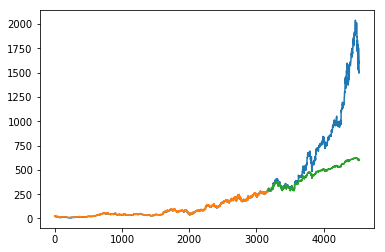

In [39]:
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(train_prediction_plot)
plt.plot(test_prediction_plot)
plt.show()